# Modelling 

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Theory Reminder**
- Unsupervised learning: estimating functions withouut the aid of outcome variable y. We only observe X and want to learn sth about its structure
 - Supervised machine learning: estimating function with known observations and outcome data (guess the values of y from the X variables). Useful for observations for which y is unknown and X is known ??
 - Supervised machine learning and/or econometrics: build a predictive model for a variable of interest, using explanatory variables (or features)
     - Econometrics: probabilisic models designed to describe economic phenomena
    - Machine Learning: algorithms search through a set of possible prediction models that capture the best relationship

**Supervised ML**
- typical supervised ML procedure:
    1. Labeled data: decompose the observations in test/training set and pre-processing of the input variables
    2. Learning: on a restricted sample: the training set; use an alogorithm to "learn" the association pattern between the input variables and the label
    3. Assessing how the model fits the data (and choosing the best model): test the validity of the model on a test set (sample of the labeled data that had been held out); fit measured using the mean squarred error"
    4. Training the best model on the full data
    5. Using the trained model for prediction tasks
  

# Loading the data

In [133]:
df=pd.read_excel("C:/Users/32498/Downloads/ECON2206-Data-Management-2023-main/GitHub/Project-data/Abriteldf.xlsx")
df

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122.0,1592.0,4.5,51,Particulier,7,3,7
1,"Grand jardin, moyenne montagne, à la campagne,...",Appartement,0,63.0,818.0,4.7,58,Particulier,4,1,3
2,Bertogne: Ardennes Belges - Gite récent en bor...,Cottage,0,74.0,957.0,4.4,81,Particulier,6,3,7
3,Chalet Zutendaal,Chalet,0,65.0,851.0,0.0,0,rien,4,2,0
4,Ferme de Filot,Ferme,1,67.0,870.0,4.6,17,Particulier,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
420,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,190.0,2465.0,3.3,3,Annonce professionnelle,2,1,1
421,1001 nuits avec vue Theatresquare,Maison,0,101.0,NaN,0.0,0,Annonce professionnelle,4,1,3
422,Bunte Stuv - Maison de vacances moderne et trè...,Maison,1,100.0,1298.0,0.0,0,rien,4,2,2
423,Près du Parlement Européen - Appartement rénov...,Appartement,1,216.0,2809.0,4.7,93,Particulier,5,2,3


In [134]:
df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)
#mapping = {'Annonce professionnelle': 1, 'Particulier': 0, 'rien': 'None'}
#df['Type of annoucement'] = df['Type of annoucement'].map(mapping)
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds
420,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,190.0,2465.0,3.3,3.0,Annonce professionnelle,2.0,1.0,1.0
421,1001 nuits avec vue Theatresquare,Maison,0,101.0,NaN,0.0,0.0,Annonce professionnelle,4.0,1.0,3.0
422,Bunte Stuv - Maison de vacances moderne et trè...,Maison,1,100.0,1298.0,0.0,0.0,rien,4.0,2.0,2.0
423,Près du Parlement Européen - Appartement rénov...,Appartement,1,216.0,2809.0,4.7,93.0,Particulier,5.0,2.0,3.0
424,Belle et charmante maison Perfect Location,Maison,0,NaN,NaN,3.6,7.0,Particulier,7.0,4.0,0.0


In [135]:
#The last line contains NaN so we delete it
df = df.drop(df.index[-1])
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds
419,Villa Oostduinkerke,Villa,0,129.0,1679.0,0.0,0.0,Particulier,6.0,3.0,4.0
420,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,190.0,2465.0,3.3,3.0,Annonce professionnelle,2.0,1.0,1.0
421,1001 nuits avec vue Theatresquare,Maison,0,101.0,NaN,0.0,0.0,Annonce professionnelle,4.0,1.0,3.0
422,Bunte Stuv - Maison de vacances moderne et trè...,Maison,1,100.0,1298.0,0.0,0.0,rien,4.0,2.0,2.0
423,Près du Parlement Européen - Appartement rénov...,Appartement,1,216.0,2809.0,4.7,93.0,Particulier,5.0,2.0,3.0


In [124]:
print(df.dtypes)

Name                    object
Type                    object
hote premium             int64
Price per Night        float64
Total Price            float64
Rating                 float64
Appreciations          float64
Type of annoucement     object
Number of Guests       float64
Number of Bedrooms     float64
Number of Beds         float64
dtype: object


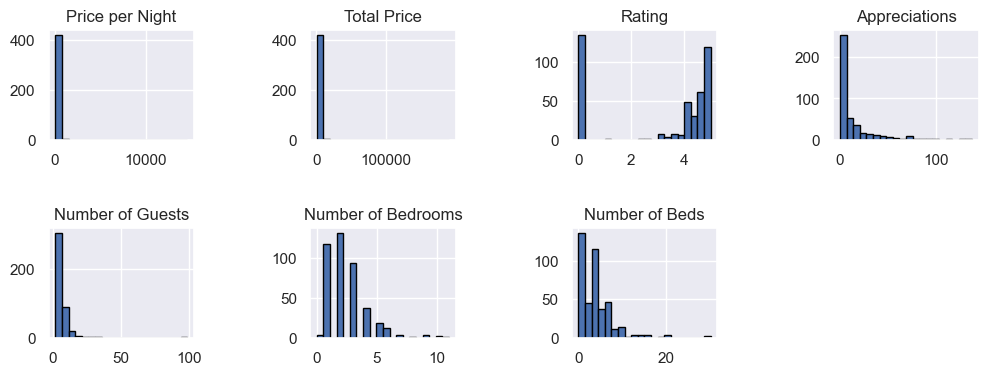

In [126]:
df_numerical = df.select_dtypes(include='float')

df_numerical.hist(bins=20, figsize=(12, 22), edgecolor="black",
                    layout=(9, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

# Econometrics regression

In [127]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML

warnings.filterwarnings("ignore")

$$\PriceperNight = \alpha + \beta_1 \texttt{Rating} + \beta_2 \texttt{Number of Guests} + \epsilon $$

In [137]:
df['lnprice']=np.log(df['Price per Night'])
#df=df.rename(columns={'Number of Guests':'nb_guests'})
df.head()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lnprice
0,"95 m2 Appartement 5étage , 3 chambres, Wi-fi, ...",Appartement,1,122.0,1592.0,4.5,51.0,Particulier,7.0,3.0,7.0,4.804021
1,"Grand jardin, moyenne montagne, à la campagne,...",Appartement,0,63.0,818.0,4.7,58.0,Particulier,4.0,1.0,3.0,4.143135
2,Bertogne: Ardennes Belges - Gite récent en bor...,Cottage,0,74.0,957.0,4.4,81.0,Particulier,6.0,3.0,7.0,4.304065
3,Chalet Zutendaal,Chalet,0,65.0,851.0,0.0,0.0,rien,4.0,2.0,0.0,4.174387
4,Ferme de Filot,Ferme,1,67.0,870.0,4.6,17.0,Particulier,4.0,1.0,2.0,4.204693


Faudrait prendre le rating qu'on a clean dans la partie visualisation je crois. Ou au moins supprimé le zéro

In [129]:
reg = smf.ols(formula='lnprice~Rating+nb_guests', data=df).fit(cov_type="HC1")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.480
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0850
Time:                        13:34:12   Log-Likelihood:                -379.33
No. Observations:                 424   AIC:                             764.7
Df Residuals:                     421   BIC:                             776.8
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8892      0.110     44.435      0.000       4.673       5.105
Rating        -0.0225      0.015     -1.548      0.122      -0.051       0.006
nb_guests      0.0308      0.017      1.787      0.074      -0.003       0.065
==============================================================================
Omnibus:                      181.360   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1899.047
Skew:                           1.532   Prob(JB):                         0.00
Kurtosis:                      12.905   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<AxesSubplot: xlabel='Rating', ylabel='lnprice'>

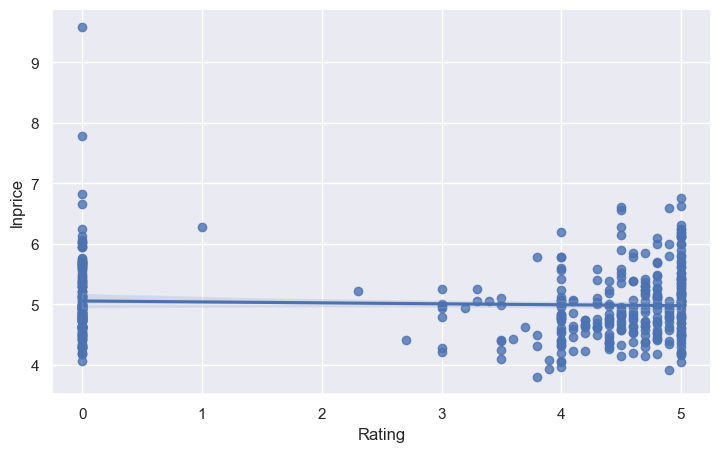

In [130]:
sns.regplot(x='Rating', y='lnprice', data=df)

# Supervised Machine Learning

In [142]:
y=df['lnprice']
#est ce que c'est mieux de prendre le ln?
features=df.drop(columns=['lnprice','Price per Night', 'Total Price'])#input

## 1. Prepare the data for ML algorithms

In [143]:
cat_col = [col for col in features if df[col].dtype == 'object']
dum_col = [col for col in features if df[col].dtype == 'int64']
num_col = [col for col in features if df[col].dtype == 'float64']

In [144]:
x=features[num_col]

## 2. Split train test sets

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (339, 5) (339,)
test data (85, 5) (85,)


In [146]:
numeric_columns=list(X_train.select_dtypes('float64').columns)
categorical_columns=list(X_train.select_dtypes('int64').columns)

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', OneHotEncoder() ,categorical_columns),
])
#for numerical columns --> standardscaler; for categorical columns --> OneHotEncoder

X_train_scaled=pipeline.fit_transform(X_train)
X_test_scaled=pipeline.fit_transform(X_test)

## 3. Select and train a model

In [148]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [149]:
X_train_num=X_train[numeric_columns]
lin_reg.fit(X_train_num, y_train)

LinearRegression()

In [150]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_num, y_train), 2)))

R-squared for training dataset:0.23


In [151]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.23


**The R-squared is really low: what can we do abt it?**

In [152]:
lin_reg.coef_

array([-0.03463866, -0.08284384,  0.01041242,  0.19297851,  0.11387539])

In [153]:
print('The coefficients of the features from the linear model:')
print(dict(zip(num_col+dum_col, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'Rating': -0.03, 'Appreciations': -0.08, 'Number of Guests': 0.01, 'Number of Bedrooms': 0.19, 'Number of Beds': 0.11}


## 5. Metrics/ Error measures

In [154]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)

In [155]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMSE: 0.553871595424295


In [156]:
#1. Out-of-sample performance = test RMSE
y_test_pred = lin_reg.predict(X_test_scaled)    
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 0.5218479415600792


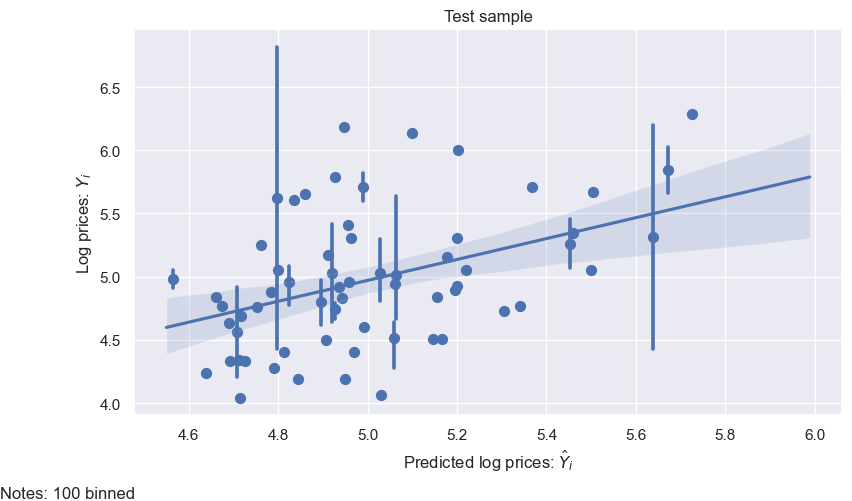

In [157]:
import seaborn as sns

g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")

plt.xlabel("Predicted log prices: $\hat{Y}_i$")
plt.ylabel("Log prices: $Y_i$")
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

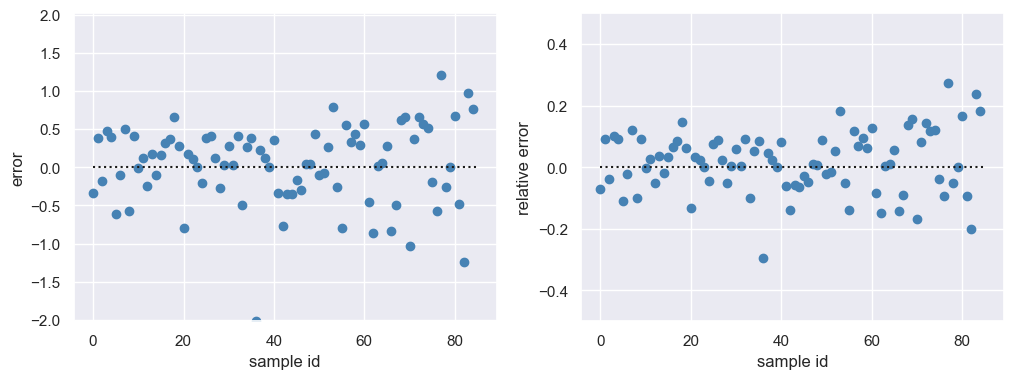

In [159]:
#Let us plot how good given and predicted values match on the training data set (sic !).
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)